In [92]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import linregress
from datetime import datetime
from statistics import mean

In [93]:
path_A =('Austin_data.csv')
path_D = ('Dallas_data.csv')

austin_df=pd.read_csv(path_A)
dallas_df=pd.read_csv(path_D)

In [94]:
#Get the indexes
path =('Hotness_ratio.csv')
hotness_ratio =pd.read_csv(path)

merge_A_data=pd.merge(austin_df,hotness_ratio, how='outer')
merge_D_data=pd.merge(dallas_df,hotness_ratio, how='outer')

merge_Austin_data=merge_A_data.loc[merge_A_data['CR Austin']>0]
merge_Dallas_data=merge_D_data.loc[merge_D_data['CR Dallas']>0]


In [95]:
merge_Austin_data.head(5)


,City,State,Month,Median Sale Price,Median Sale Price MoM,Homes Sold,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List,CR Austin,CR Dallas
11,Austin,Texas,2013-01-31,198.0,-5.2,1543,5115,-5.8,49,0,97.2,82.0,NaN
12,Austin,Texas,2013-02-28,207.0,4.6,1782,5162,0.9,51,2,97.7,82.0,NaN
13,Austin,Texas,2013-03-31,217.0,4.8,2354,5432,5.2,29,-22,98.1,87.0,NaN
14,Austin,Texas,2013-04-30,225.0,3.7,2658,5673,4.4,19,-10,98.6,85.0,NaN
15,Austin,Texas,2013-05-31,228.0,1.3,3172,6038,6.4,19,0,98.9,87.0,NaN


In [96]:
merge_Dallas_data.head(5)

,City,State,Month,Median Sale Price,Median Sale Price MoM,Homes Sold,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List,CR Austin,CR Dallas


Calculations for Austin competitiveness ratio (RedFin) against Inventory
Y=  83.5387-0.0006 X
The r-square for this model is  0.0164
This means the significance of the model is weak


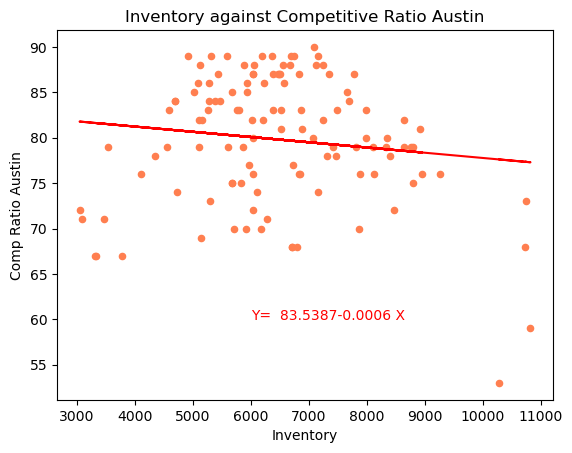

Calculations for Austin competitiveness ratio (RedFin) against Median Sale Price
Y=  96.5817-0.0525 X
The r-square for this model is  0.4159
This means the significance of the model is moderate


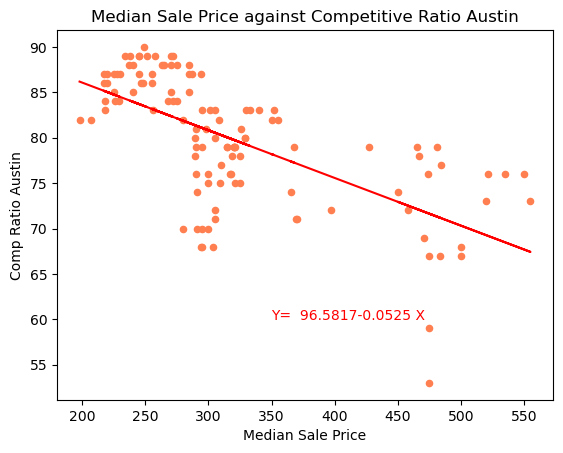

Calculations for Austin competitiveness ratio (RedFin) against Days on Market
Y=  93.0183-0.4361 X
The r-square for this model is  0.4370
This means the significance of the model is moderate


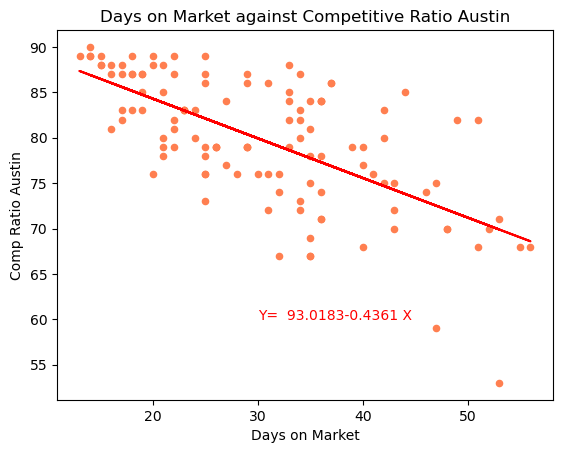

In [111]:
#Calculates regression lines for hotness index vs inventories, price, days in market
cities=['Austin']#,'Dallas']
variables=['Inventory', 'Median Sale Price', 'Days on Market']
hot_ratio=''

for variable in variables:
	for city in cities:
		if city =='Austin':
			x_val=merge_Austin_data[variable]
			result=linregress(merge_Austin_data[variable],merge_Austin_data['CR Austin'])
			merge_Austin_data.plot(kind='scatter',x= f"{variable}",y='CR Austin',c="coral")
		else:
			x_val=merge_Dallas_data[variable]
			result=linregress(merge_Dallas_data[variable],merge_Dallas_data['CR Dallas'])
			merge_Dallas_data.plot(kind='scatter',x= f"{variable}",y='CR Dallas',c="midnightblue")

	abs_result=abs(result.rvalue)
	
	if abs_result < 0.4:
		significance ='weak'
	elif abs_result <= 0.8: 
		significance='moderate'
	elif abs_result >= 0.8:
		significance='strong'

	if result.slope <0:
		operator =""
	else:
		operator ="+"

	#Prints the results of the regression
	reg_line=f'Y= {result.intercept: 0.4f}{operator}{result.slope: 0.4f} X'
	regression = x_val * result.slope + result.intercept

	if variable =='Inventory':
		point=6000
	elif variable =='Median Sale Price':
		point=350
	else: 
		point=30
	

	print(f'Calculations for {city} competitiveness ratio (RedFin) against {variable}')
	print(reg_line)	
	print(f'The r-square for this model is {result.rvalue**2: 0.4f}')
	print(f'This means the significance of the model is {significance}')

	#Formats, dsiplay and saves the graphs
	plt.title(f'{variable} against Competitive Ratio {city}')
	plt.xlabel(f'{variable}')
	plt.ylabel(f"Comp Ratio {city}")	
	plt.plot(x_val,regression,"r-")
	plt.annotate(reg_line, (point,60), fontsize=10,color="red")
		
	# Save the figure
	plt.savefig(f"Regression_CR_{variable}_{city}.png")
	plt.show()
